# Titanic Survival Prediction

## Importing Libraries & Packages

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Loading Data

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.shape

(891, 12)

In [4]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Dropping unnecessary columns

In [5]:
delete_columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']
dataset = dataset.drop(delete_columns,axis=1)
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


## Handling null values

In [7]:
dataset['Age'].isnull().sum()

177

In [8]:
dataset = dataset.fillna(value=dataset['Age'].mean())

In [9]:
dataset['Age'].isnull().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Sex"] = le.fit_transform(dataset["Sex"])

## Splitting Dataset

In [11]:
predictors = dataset.iloc[:,1:]
target = dataset.iloc[:,0]

In [12]:
predictors_train, predictors_test,target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=123)

## Model Training

In [13]:
dtree_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)

In [14]:
model = dtree_entropy.fit(predictors_train, target_train)

## Model Testing

In [15]:
prediction = dtree_entropy.predict(predictors_test)

In [16]:
acc = accuracy_score(target_test, prediction, normalize=True)
print("Accuracy of model : ",acc)

Accuracy of model :  0.8208955223880597


## Confusiong Matrix Plot

Confusion Matrix : 


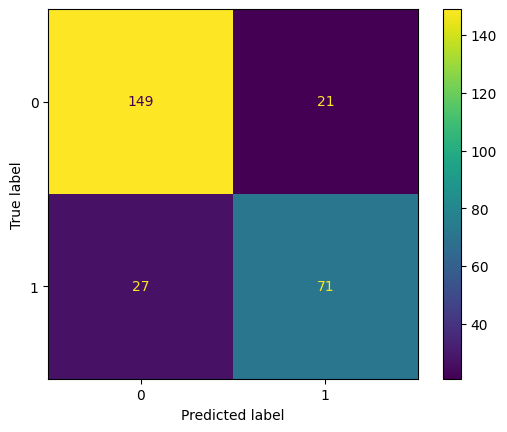

In [17]:
print("Confusion Matrix : ")
cm = confusion_matrix(target_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()